In [204]:
# Importing useful libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from keras import optimizers

### Data Processing

In [181]:
df = pd.read_csv('../data/num_data.csv')

In [182]:
dataset = df[:1000]

In [183]:
dataset.shape

(1000, 16)

In [255]:
# Useful functions
def plot_predictions(test, predicted):
    plt.figure(figsize=(30, 15));

    plt.plot(test, color='red', alpha=0.5, label='Actual PM2.5 Concentration',)
    plt.plot(predicted, color='blue', alpha=0.5, label='Predicted PM2.5 Concentation')
    plt.title('PM2.5 Concentration Prediction')
    plt.xlabel('Time')
    plt.ylabel('PM2.5  Concentration')
    plt.legend()
    plt.show()
    

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    return rmse

In [198]:
data_size = dataset.shape[0]
train_size=int(data_size * 0.6)
test_size = 100
valid_size = data_size - train_size - test_size

test_next_day = [12, 24, 48]

In [202]:
training_set = dataset[:train_size].iloc[:,4:16].values
valid_set = dataset[train_size:train_size+valid_size].iloc[:,4:16].values
test_set = dataset[data_size-test_size:].iloc[:,4:16].values

In [203]:
# Scaling the dataset
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)
valid_set_scaled = sc.fit_transform(valid_set)
test_set_scaled = sc.fit_transform(test_set)

In [288]:
X_train = []
y_train = []
seq_len = 24 # the length of timesteps in time-series analysis
for i in range(seq_len, train_size):
    X_train.append(training_set_scaled[i-seq_len:i,:])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [209]:
X_valid = []
y_valid = []

for i in range(seq_len, valid_size):
    X_valid.append(valid_set_scaled[i-seq_len:i,:])
    y_valid.append(valid_set_scaled[i,0])
X_valid, y_valid = np.array(X_valid), np.array(y_valid)

In [210]:
X_test = []
y_test = []

for i in range(seq_len, test_size):
    X_test.append(test_set_scaled[i-seq_len:i,:])
    y_test.append(test_set_scaled[i,0])
X_test, y_test = np.array(X_test), np.array(y_test)

In [230]:
X_train.shape

(576, 24, 12)

In [231]:
y_train.shape

(576,)

In [238]:
GRU_reg = Sequential()
LSTM_reg = Sequential()
GRU_GRU_reg =  Sequential()
GRU_LSTM_reg = Sequential()
LSTM_GRU_reg = Sequential()
LSTM_LSTM_reg = Sequential()


GRU_reg.add(GRU(units=50, input_shape=(X_train.shape[1],12), activation='tanh'))
# The output layer
GRU_reg.add(Dense(units=1))


LSTM_reg.add(LSTM(units=50, input_shape=(X_train.shape[1],12), activation='tanh'))
LSTM_reg.add(Dense(units=1))


GRU_GRU_reg.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],12), activation='tanh'))
GRU_GRU_reg.add(GRU(units=50, activation='tanh'))
GRU_GRU_reg.add(Dense(units=1))


LSTM_LSTM_reg.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],12), activation='tanh'))
LSTM_LSTM_reg.add(LSTM(units=50, activation='tanh'))
LSTM_LSTM_reg.add(Dense(units=1))


LSTM_GRU_reg.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],12), activation='tanh'))
LSTM_GRU_reg.add(GRU(units=50, activation='tanh'))
LSTM_GRU_reg.add(Dense(units=1))


GRU_LSTM_reg.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],12), activation='tanh'))
GRU_LSTM_reg.add(LSTM(units=50, activation='tanh'))
GRU_LSTM_reg.add(Dense(units=1))

# Compiling the RNNs
adam = optimizers.Adam(lr=0.01)

GRU_reg.compile(optimizer=adam,loss='mean_squared_error')
LSTM_reg.compile(optimizer=adam,loss='mean_squared_error')
GRU_GRU_reg.compile(optimizer=adam,loss='mean_squared_error')
LSTM_LSTM_reg.compile(optimizer=adam,loss='mean_squared_error')
LSTM_GRU_reg.compile(optimizer=adam,loss='mean_squared_error')
GRU_LSTM_reg.compile(optimizer=adam,loss='mean_squared_error')

In [261]:
RnnModelDict = {'LSTM': LSTM_reg, 'GRU': GRU_reg, 'LSTM_LSTM': LSTM_LSTM_reg, 'GRU_GRU': GRU_GRU_reg, 
                'LSTM_GRU': LSTM_GRU_reg, 'GRU_LSTM': GRU_LSTM_reg}

X_test_12 = X_test[:12]
y_test_12 = y_test[:12]
X_test_24 = X_test[:24]
y_test_24 = y_test[:24]
X_test_48 = X_test[:48]
y_test_48 = y_test[:48]

rmse_df = pd.DataFrame(columns=['Model', 'train_rmse', 'valid_rmse', '12h_pred_rmse', 
                                '24h_pred_rmse', '48h_pred_rmse'])



In [263]:
one_df

,Model,train_rmse,valid_rmse,12h_pred_rmse,24h_pred_rmse,48h_pred_rmse
0,1,2,3,4,5,6


In [266]:
rmse_df

,Model,train_rmse,valid_rmse,12h_pred_rmse,24h_pred_rmse,48h_pred_rmse
0,1,2,3,4,5,6
0,1,2,3,4,5,6
0,1,2,3,4,5,6


training start for LSTM
Epoch 1/50
576/576 [==============================] - 0s 310us/step - loss: 0.0016
Epoch 2/50
576/576 [==============================] - 0s 275us/step - loss: 0.0018
Epoch 3/50
576/576 [==============================] - 0s 266us/step - loss: 0.0019
Epoch 4/50
576/576 [==============================] - 0s 280us/step - loss: 0.0016
Epoch 5/50
576/576 [==============================] - 0s 279us/step - loss: 0.0017
Epoch 6/50
576/576 [==============================] - 0s 272us/step - loss: 0.0015
Epoch 7/50
576/576 [==============================] - 0s 296us/step - loss: 0.0015
Epoch 8/50
576/576 [==============================] - 0s 281us/step - loss: 0.0014
Epoch 9/50
576/576 [==============================] - 0s 277us/step - loss: 0.0014
Epoch 10/50
576/576 [==============================] - 0s 268us/step - loss: 0.0014
Epoch 11/50
576/576 [==============================] - 0s 281us/step - loss: 0.0015
Epoch 12/50
576/576 [==============================] - 0s 297

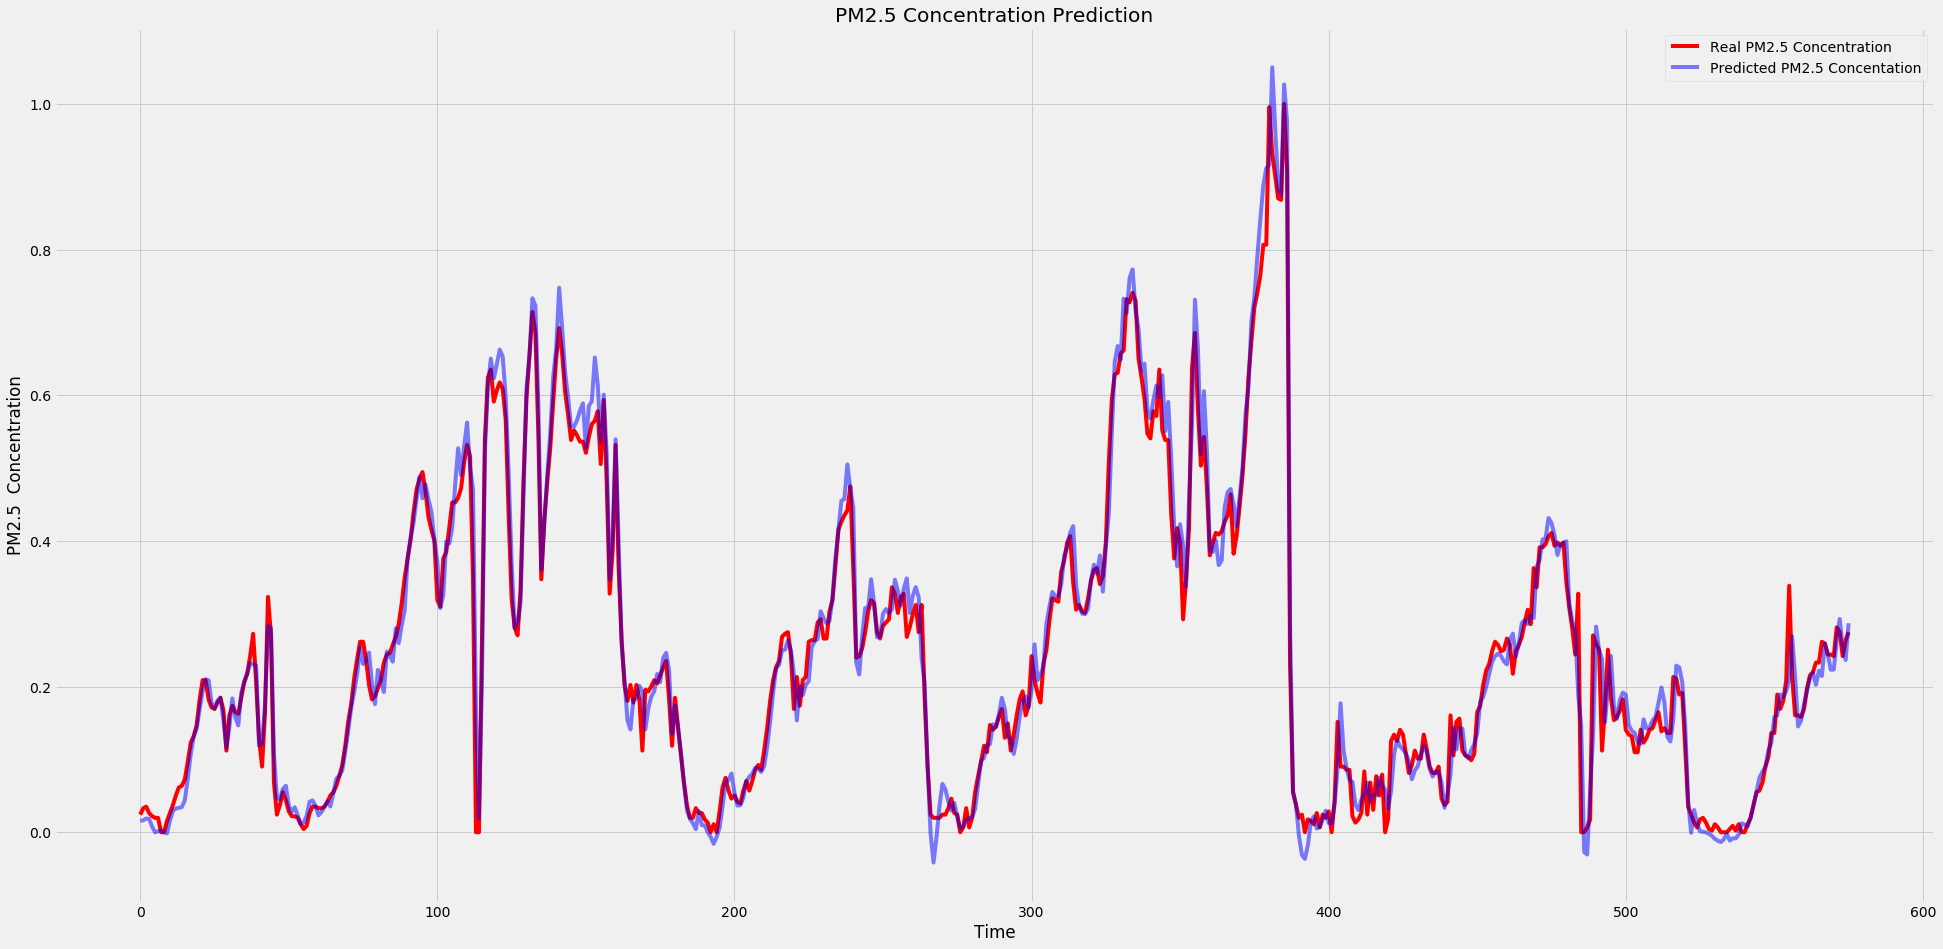

The root mean squared error is 0.03242166375991824.
results for valid set


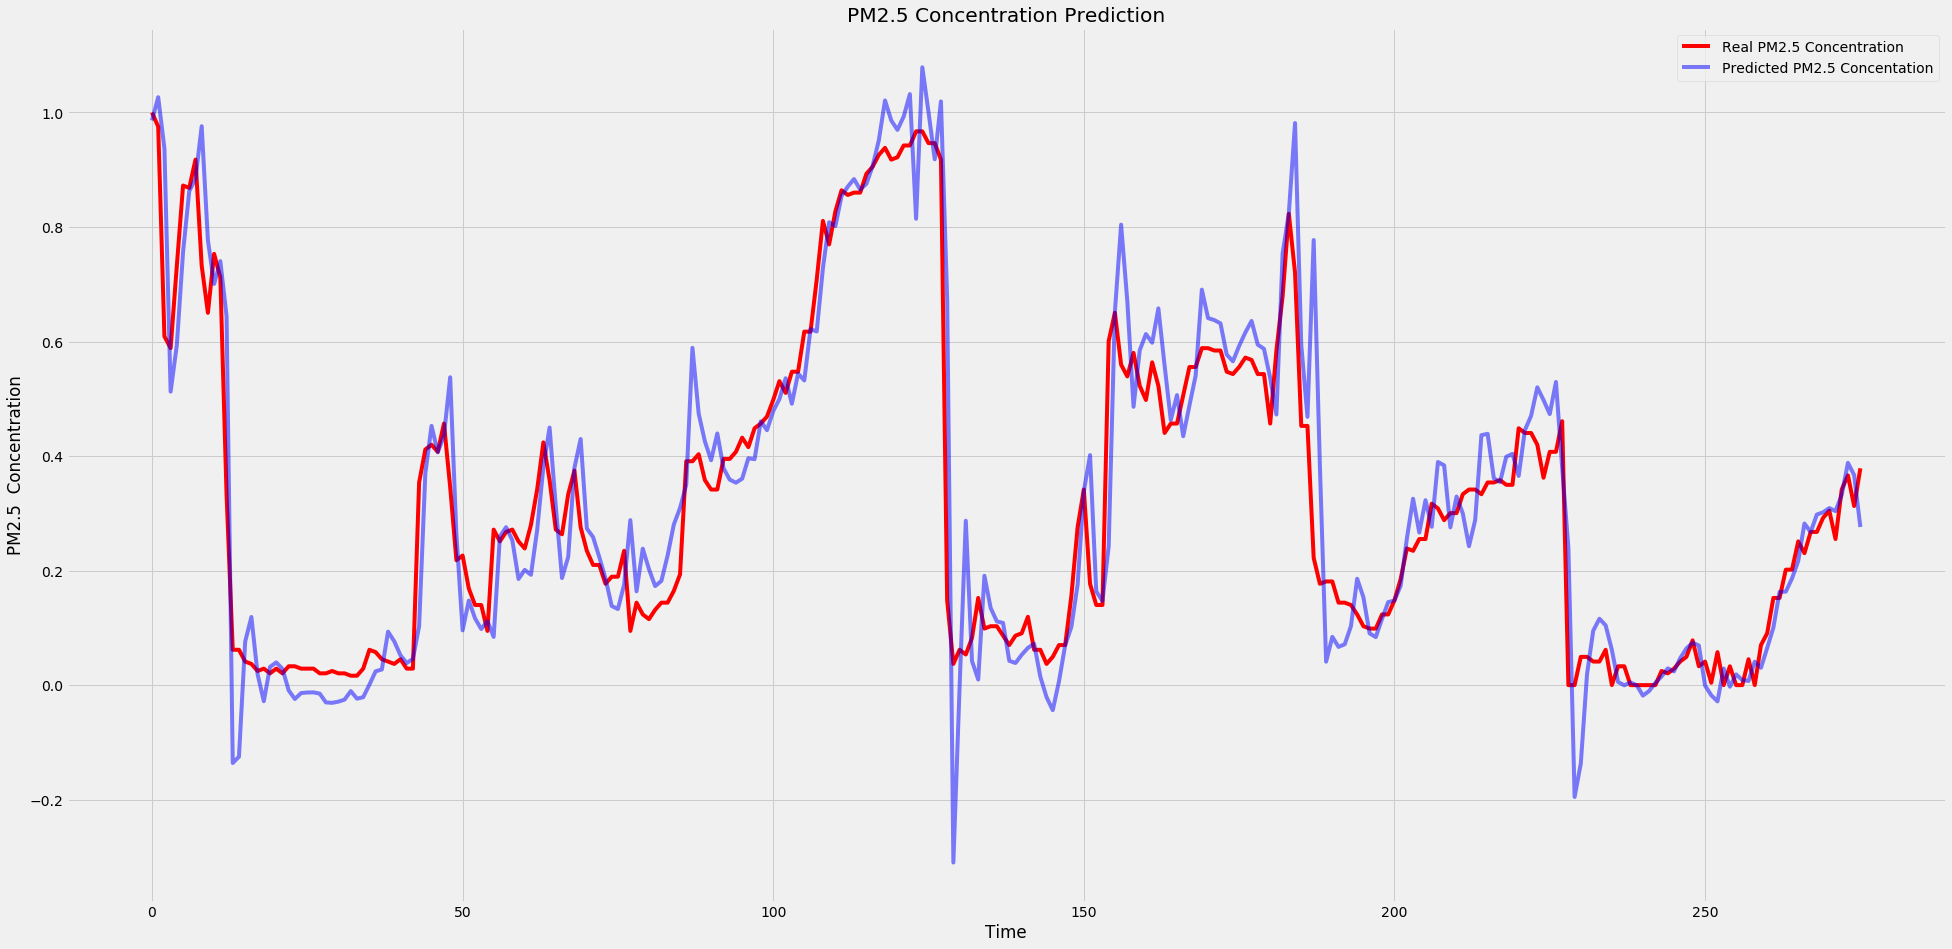

The root mean squared error is 0.09883614146627788.
training start for GRU
Epoch 1/50
576/576 [==============================] - 0s 296us/step - loss: 9.3019e-04
Epoch 2/50
576/576 [==============================] - 0s 310us/step - loss: 0.0010
Epoch 3/50
576/576 [==============================] - 0s 300us/step - loss: 0.0012
Epoch 4/50
576/576 [==============================] - 0s 339us/step - loss: 0.0013
Epoch 5/50
576/576 [==============================] - 0s 324us/step - loss: 0.0014
Epoch 6/50
576/576 [==============================] - 0s 287us/step - loss: 0.0013
Epoch 7/50
576/576 [==============================] - 0s 304us/step - loss: 0.0010
Epoch 8/50
576/576 [==============================] - 0s 293us/step - loss: 8.6101e-04
Epoch 9/50
576/576 [==============================] - 0s 292us/step - loss: 7.5889e-04
Epoch 10/50
576/576 [==============================] - 0s 288us/step - loss: 8.8337e-04
Epoch 11/50
576/576 [==============================] - 0s 303us/step - loss: 9

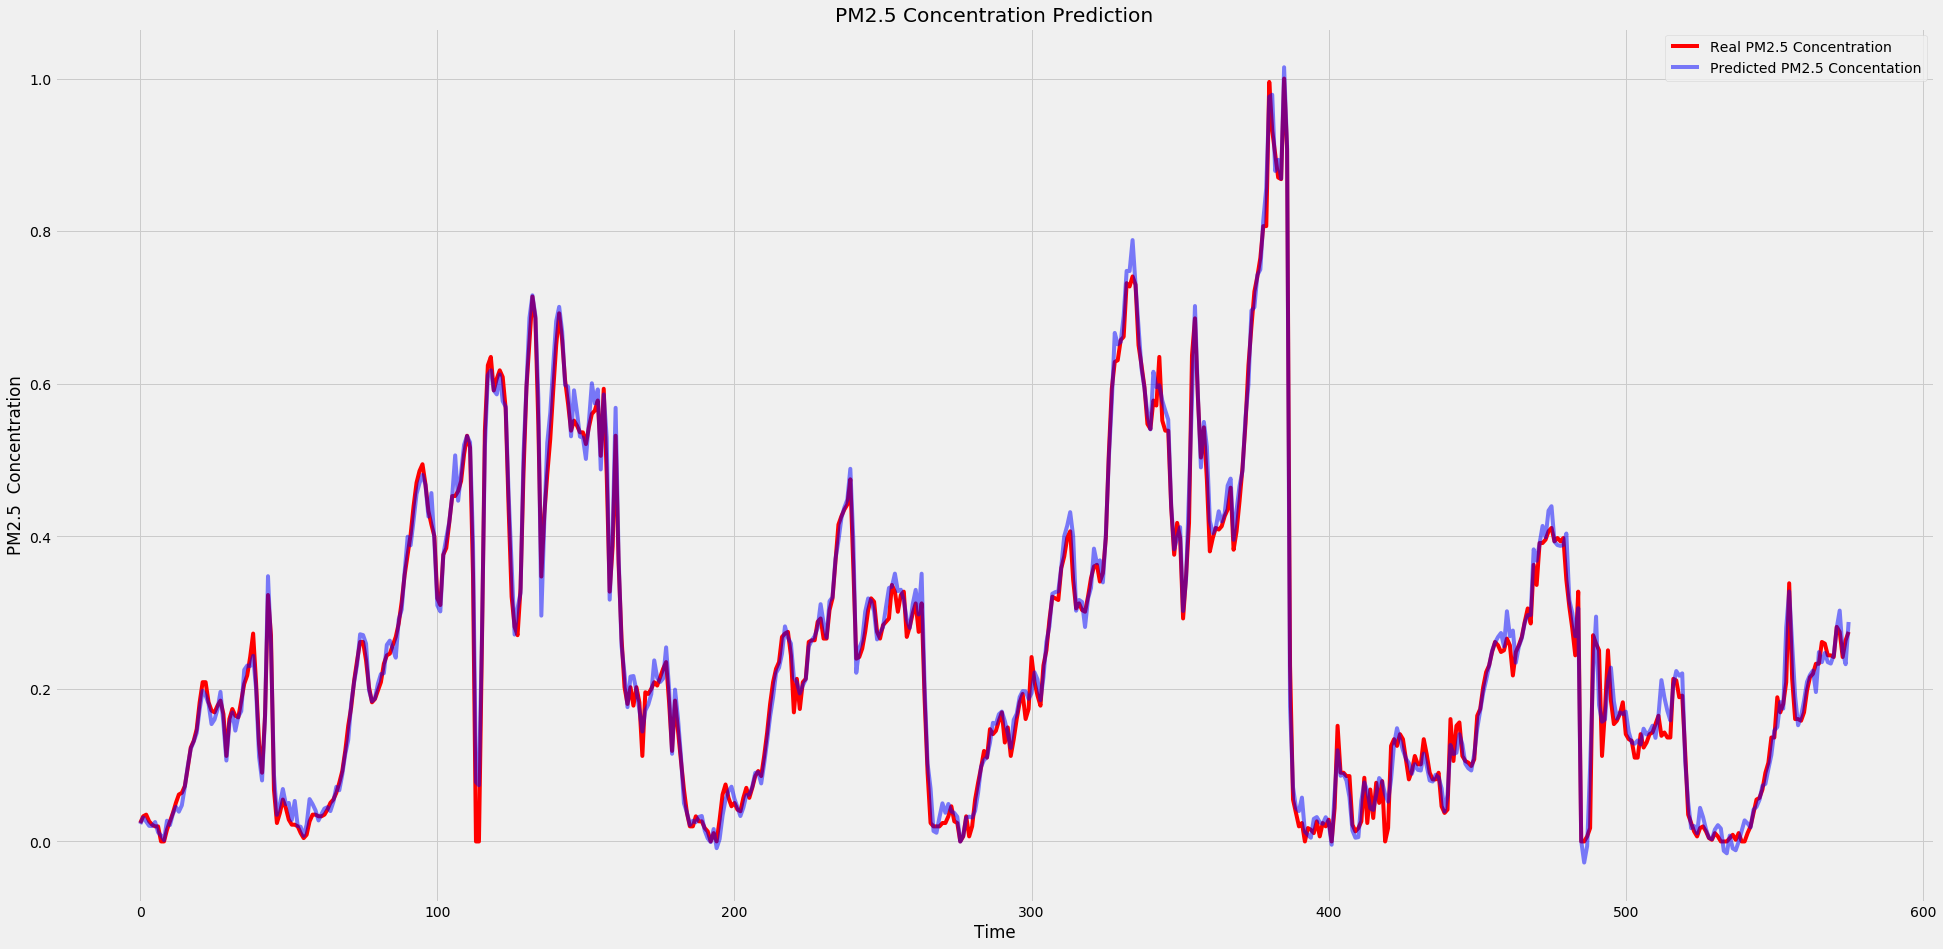

The root mean squared error is 0.020270242888743656.
results for valid set


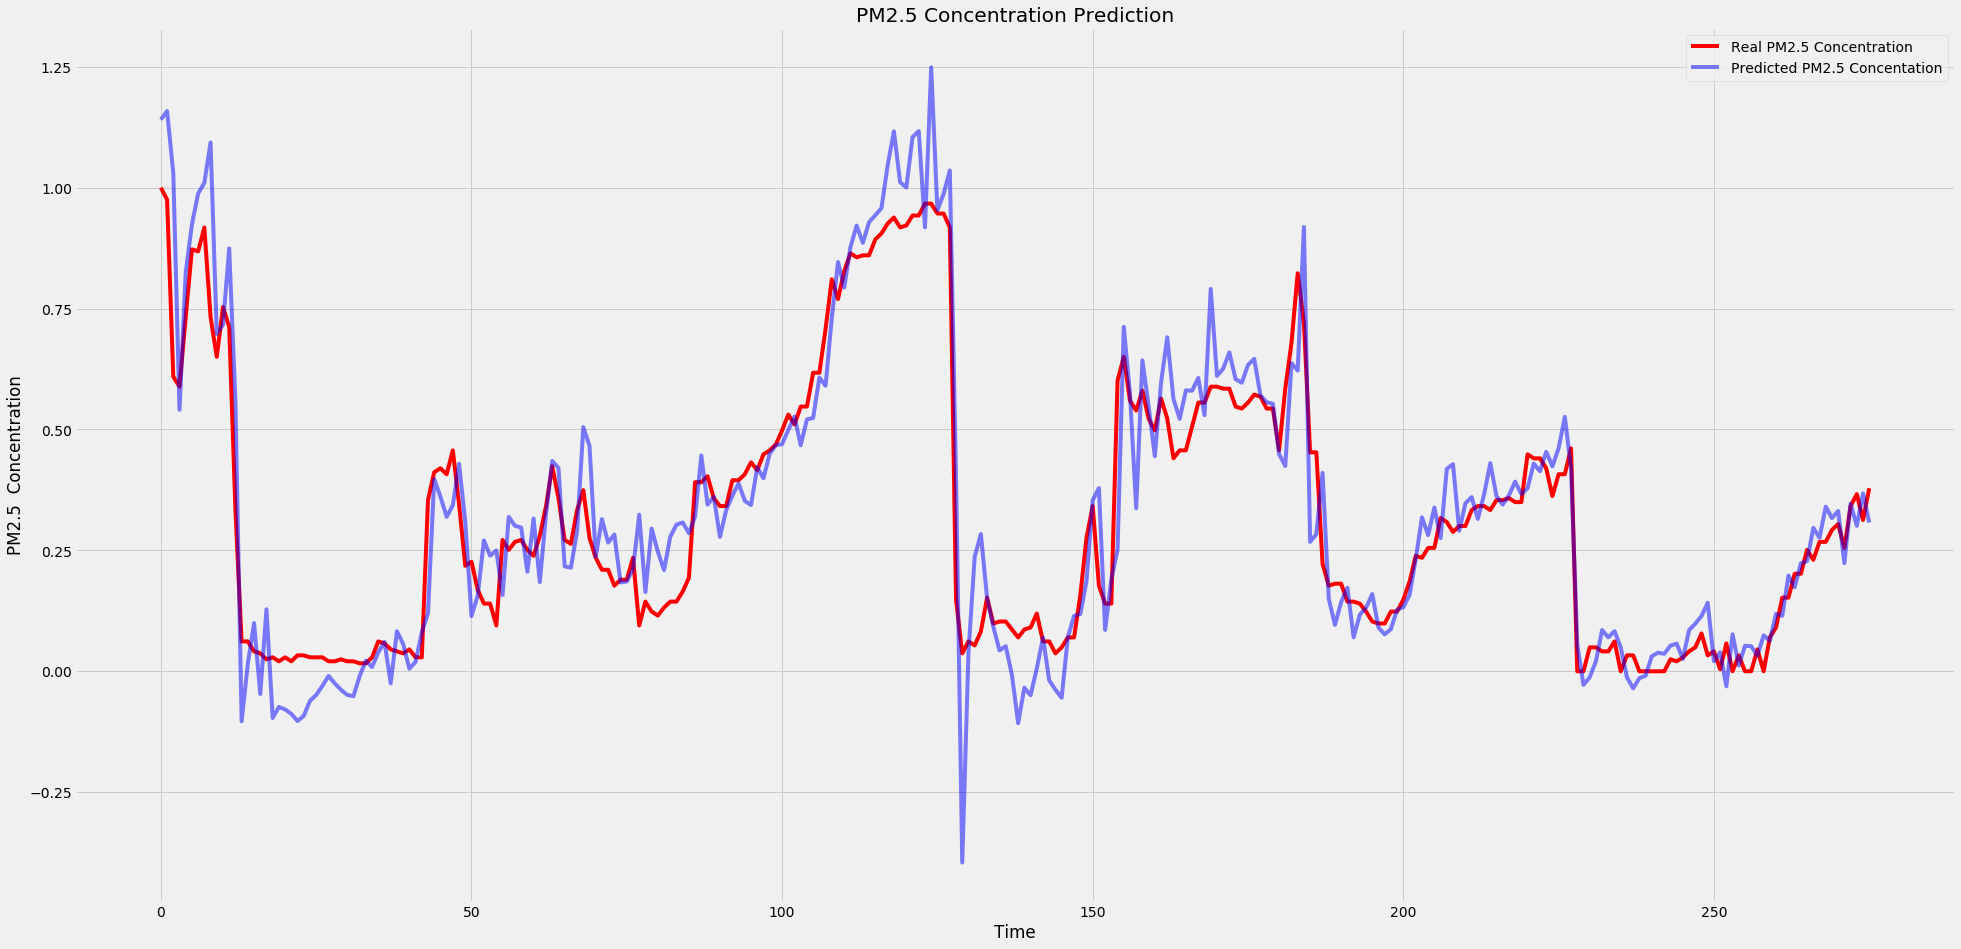

The root mean squared error is 0.09824280601424755.
training start for LSTM_LSTM
Epoch 1/50
576/576 [==============================] - 0s 454us/step - loss: 0.0019
Epoch 2/50
576/576 [==============================] - 0s 456us/step - loss: 0.0020
Epoch 3/50
576/576 [==============================] - 0s 453us/step - loss: 0.0025
Epoch 4/50
576/576 [==============================] - 0s 452us/step - loss: 0.0018
Epoch 5/50
576/576 [==============================] - 0s 457us/step - loss: 0.0019
Epoch 6/50
576/576 [==============================] - 0s 452us/step - loss: 0.0020
Epoch 7/50
576/576 [==============================] - 0s 450us/step - loss: 0.0020
Epoch 8/50
576/576 [==============================] - 0s 462us/step - loss: 0.0019
Epoch 9/50
576/576 [==============================] - 0s 471us/step - loss: 0.0020
Epoch 10/50
576/576 [==============================] - 0s 458us/step - loss: 0.0020
Epoch 11/50
576/576 [==============================] - 0s 459us/step - loss: 0.0017
Epoc

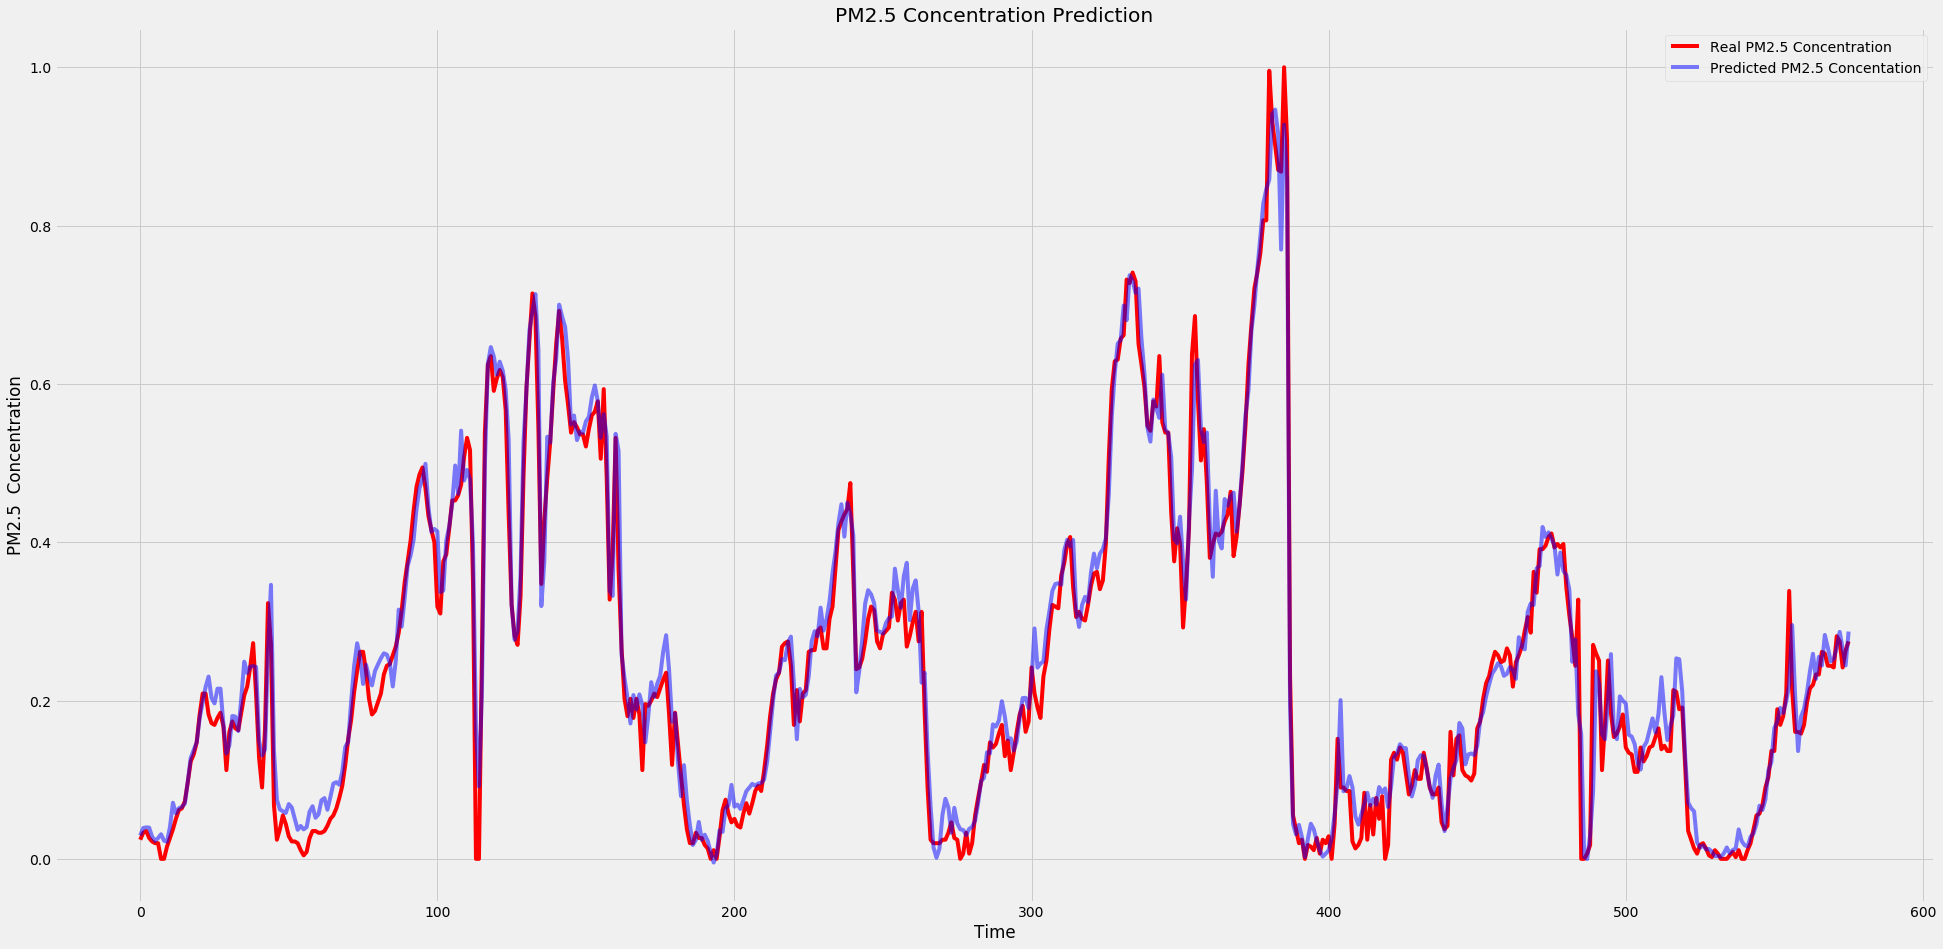

The root mean squared error is 0.03592608388025809.
results for valid set


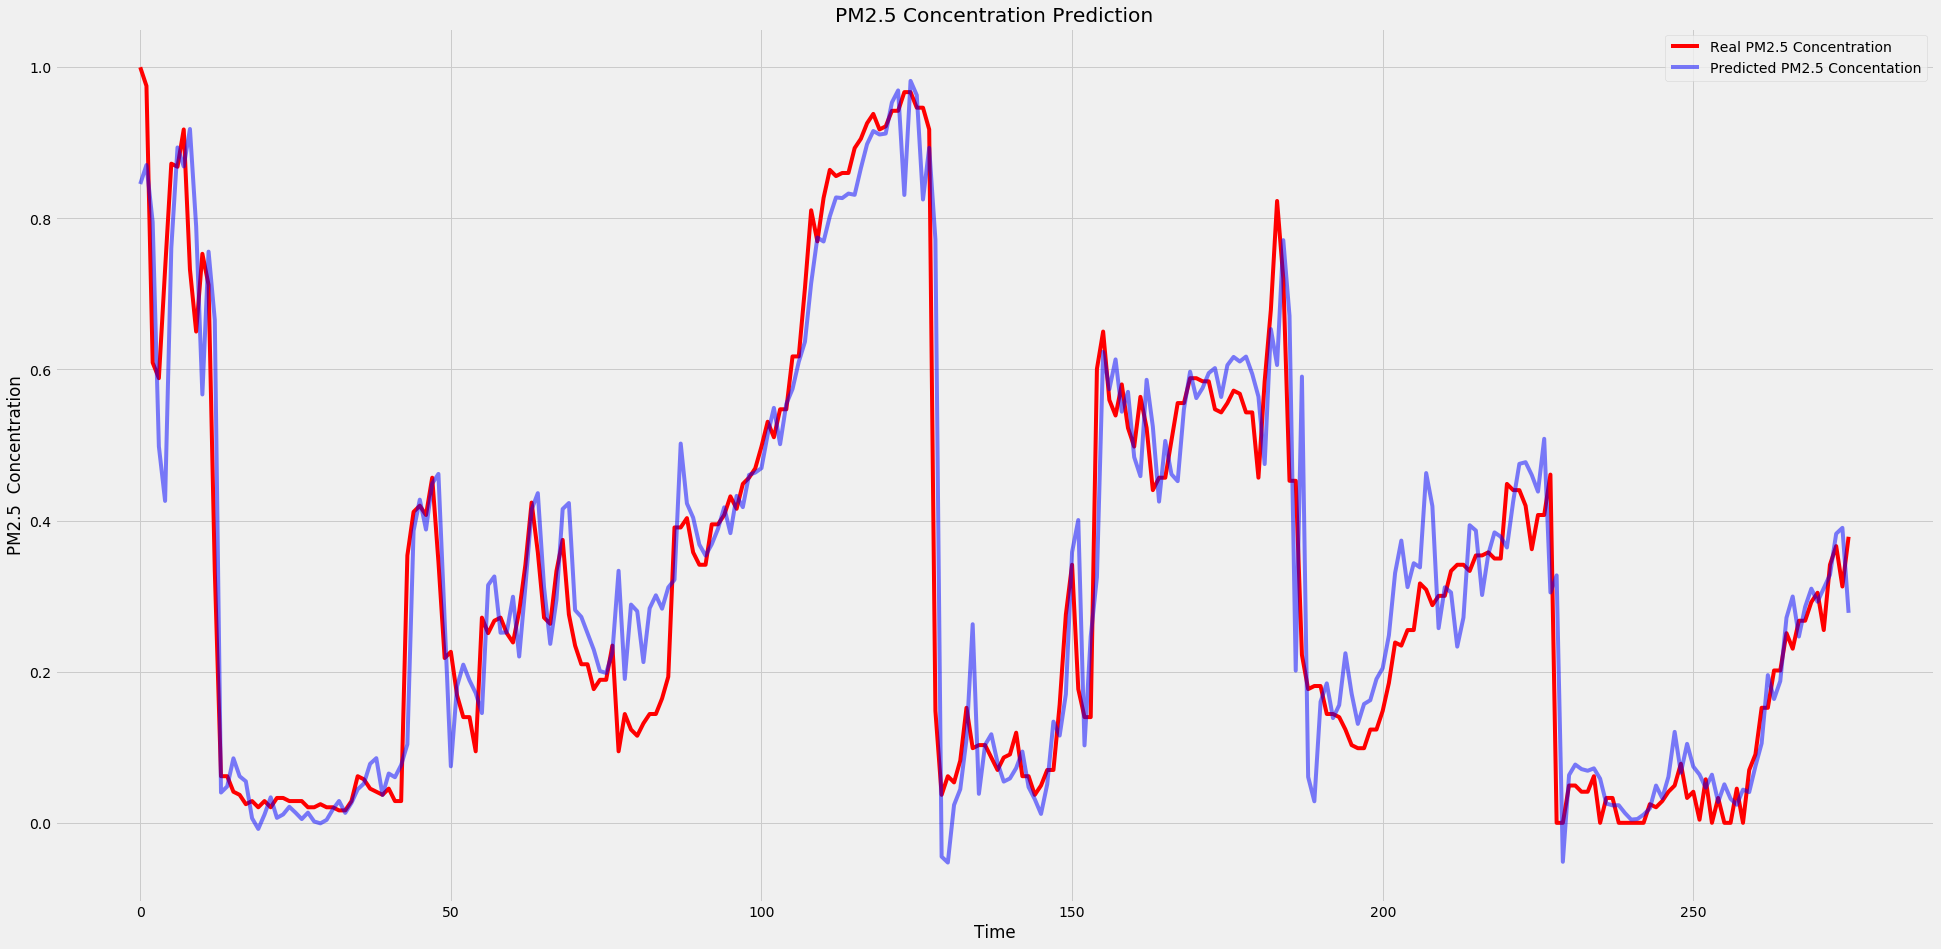

The root mean squared error is 0.09123181714001143.
training start for GRU_GRU
Epoch 1/50
576/576 [==============================] - 0s 538us/step - loss: 0.0110
Epoch 2/50
576/576 [==============================] - 0s 531us/step - loss: 0.0115
Epoch 3/50
576/576 [==============================] - 0s 588us/step - loss: 0.0081
Epoch 4/50
576/576 [==============================] - 0s 515us/step - loss: 0.0084
Epoch 5/50
576/576 [==============================] - 0s 517us/step - loss: 0.0087
Epoch 6/50
576/576 [==============================] - 0s 515us/step - loss: 0.0068
Epoch 7/50
576/576 [==============================] - 0s 542us/step - loss: 0.0068
Epoch 8/50
576/576 [==============================] - 0s 525us/step - loss: 0.0068
Epoch 9/50
576/576 [==============================] - 0s 516us/step - loss: 0.0069
Epoch 10/50
576/576 [==============================] - 0s 528us/step - loss: 0.0078
Epoch 11/50
576/576 [==============================] - 0s 549us/step - loss: 0.0059
Epoch 

KeyboardInterrupt: 

In [245]:
for model in RnnModelDict:
    regressor = RnnModelDict[model]
    
    one_df = pd.DataFrame(columns=['Model', 'train_rmse', 'valid_rmse', '12h_pred_rmse', 
                                '24h_pred_rmse', '48h_pred_rmse'])
    print('training start for', model)
    regressor.fit(X_train,y_train,epochs=50,batch_size=32)
    
    print('results for training set')
    y_train_pred = regressor.predict(X_train)
    plot_predictions(y_train,y_train_pred)
    train_rmse = return_rmse(y_train,y_train_pred)
    
    print('results for valid set')
    y_valid_pred = regressor.predict(X_valid)
    plot_predictions(y_valid,y_valid_pred)
    valid_rmse = return_rmse(y_valid,y_valid_pred)
    
    print('results for test set - 12 hours')
    y_test_pred12 = regressor.predict(X_test_12)
    plot_predictions(y_test_12,y_test_pred12)
    test12_rmse = return_rmse(y_test_12,y_test_pred12)
    
    print('results for test set - 24 hours')
    y_test_pred24 = regressor.predict(X_test_24)
    plot_predictions(y_test_24,y_test_pred24)
    test24_rmse = return_rmse(y_test_24,y_test_pred24)
    
    print('results for test set - 48 hours')
    y_test_pred48 = regressor.predict(X_test_48)
    plot_predictions(y_test_48,y_test_pred48)
    test48_rmse = return_rmse(y_test_48,y_test_pred48)
    
    one_df = pd.DataFrame([[model, train_rmse, valid_rmse, test12_rmse, test24_rmse, test48_rmse]], 
                          columns=['Model', 'train_rmse', 'valid_rmse', '12h_pred_rmse', '24h_pred_rmse',
                                   '48h_pred_rmse'])
    rmse_df = pd.concat([rmse_df, one_df])

# save the rmse results 
rmse_df.to_csv('../rmse_result.csv')




for training set


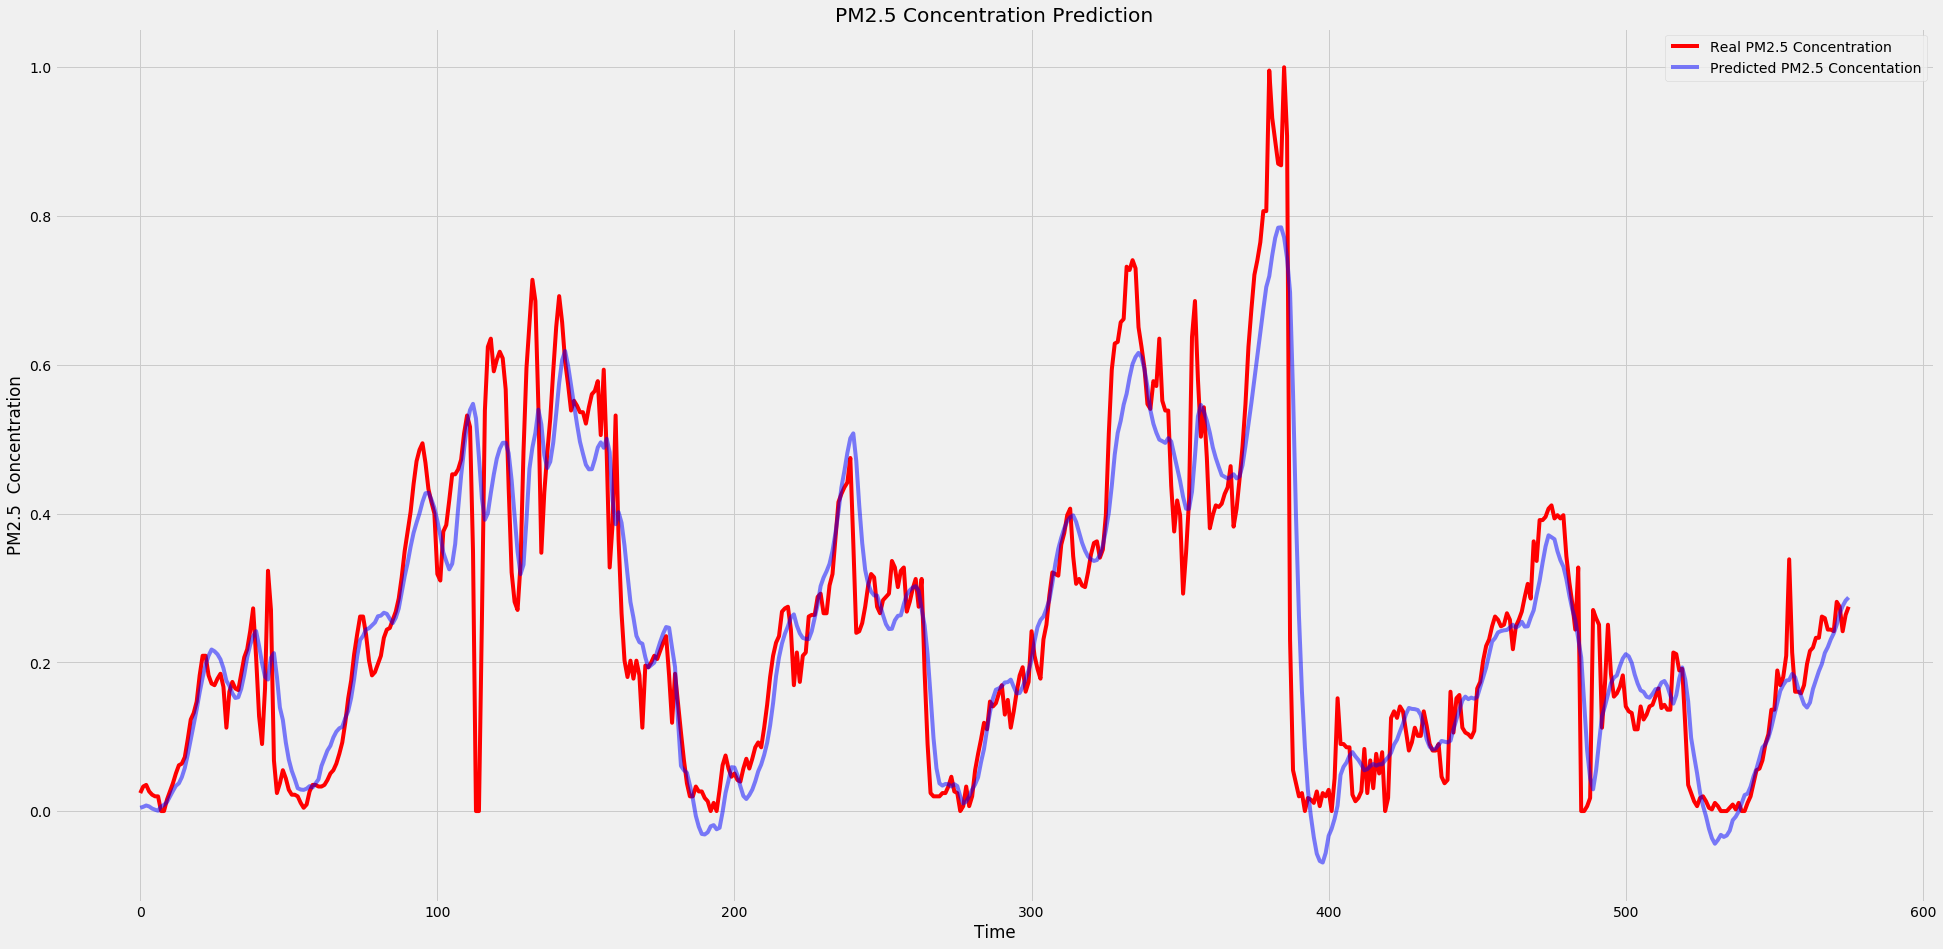

The root mean squared error is 0.08102539113960494.


In [176]:
print('results for training set')
y_train_pred = LSTM_GRU_reg.predict(X_train)
plot_predictions(y_train,y_train_pred)
return_rmse(y_train,y_train_pred)

for test set


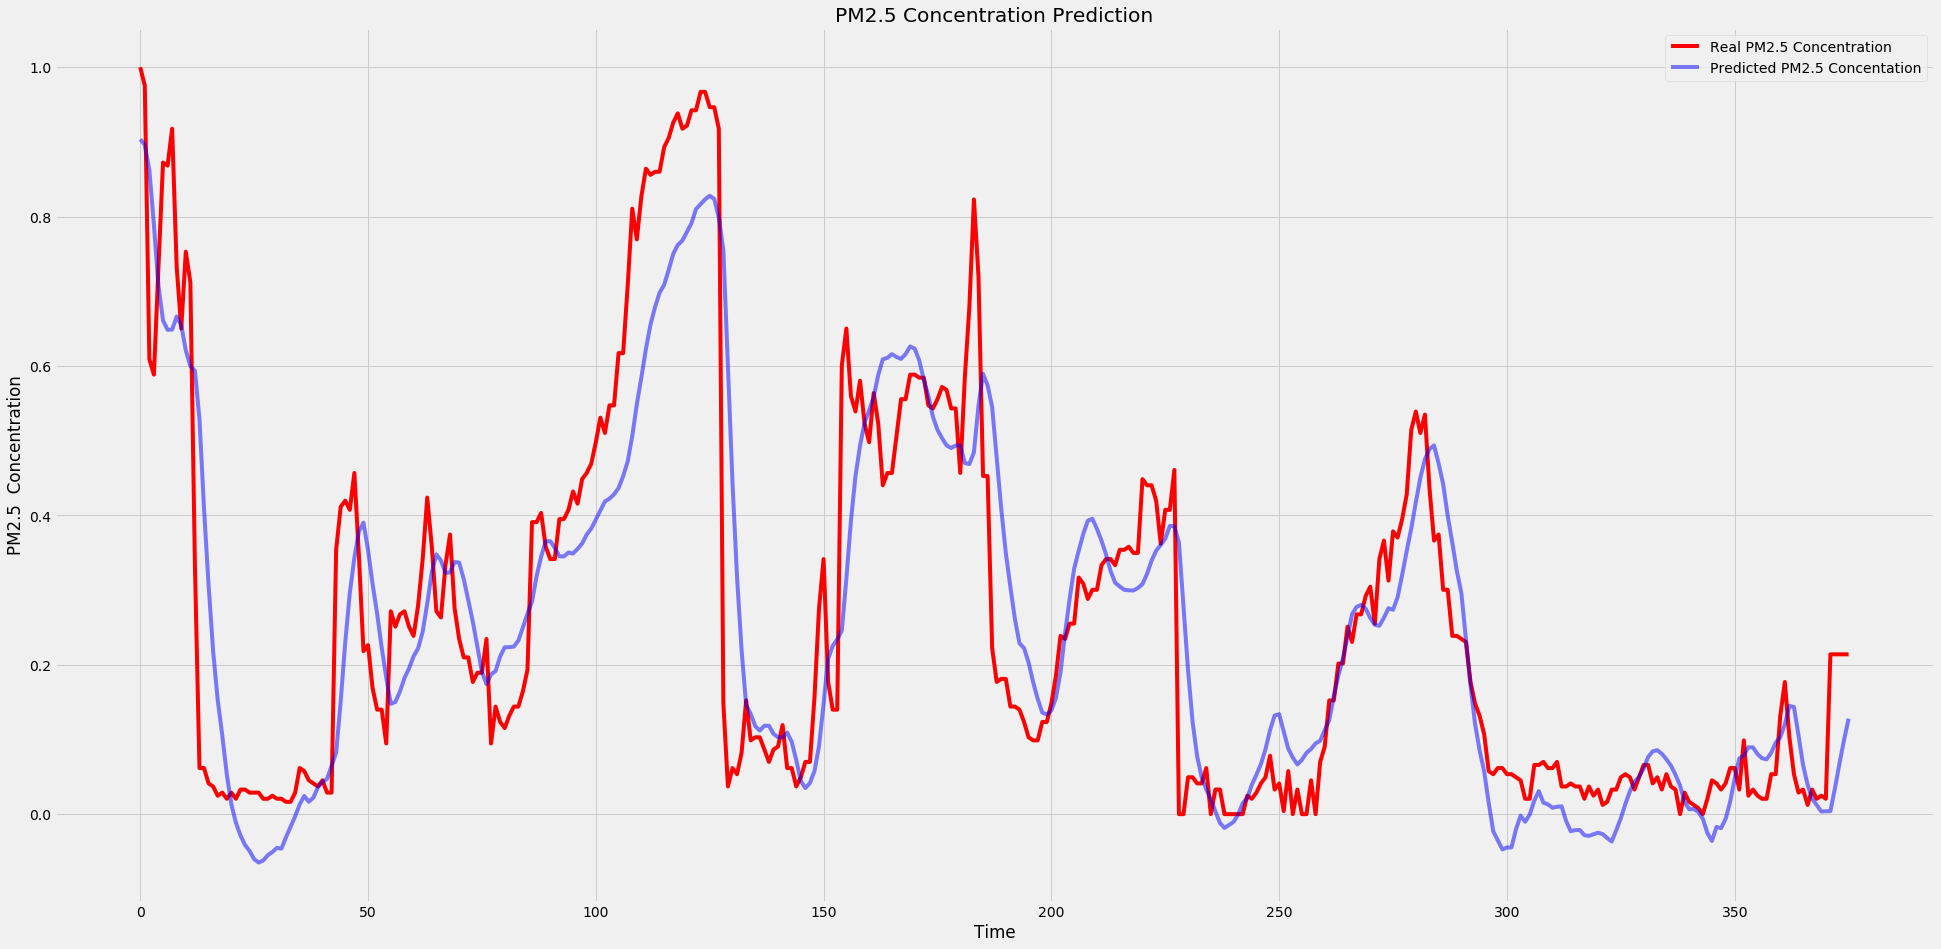

The root mean squared error is 0.11821448824421964.


In [178]:
print('for test set')
y_test_pred = LSTM_GRU_reg.predict(X_test)
plot_predictions(y_test,y_test_pred)
return_rmse(y_test,y_test_pred)

In [286]:
y_train = y_train.reshape(-1,1)
y_train.shape

(576, 1)

In [287]:
y_train = sc.inverse_transform(y_train)

ValueError: non-broadcastable output operand with shape (576,1) doesn't match the broadcast shape (576,12)

(76, 24, 12)

In [284]:

# Preparing X_test and predicting the prices
X_test = []
for i in range(seq_len,test_size+seq_len):
    X_test.append(inputs[i-seq_len:i,0])
X_test = np.array(X_test)
predicted_PM25 = LSTM_GRU_reg.predict(X_test)


ValueError: cannot reshape array of size 2400 into shape (100,24,12)

In [270]:
# Now to get the test set ready in a similar way as the training set.
# The following has been done so forst 60 entires of test set have 60 previous values which is impossible to get unless we take the whole 
# 'High' attribute data for processing
inputs = dataset[len(dataset)-len(test_set) - seq_len:].values
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)

# Preparing X_test and predicting the prices
X_test = []
for i in range(seq_len,test_size+seq_len):
    X_test.append(inputs[i-seq_len:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],12))
predicted_PM25 = LSTM_GRU_reg.predict(X_test)
predicted_PM25 = sc.inverse_transform(predicted_PM25[0])


ValueError: non-broadcastable output operand with shape (1984,1) doesn't match the broadcast shape (1984,12)

In [272]:
predicted_PM25.shape

(576, 1)